In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_complete[study_data_complete.duplicated(keep=False)]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseData = study_data_complete[study_data_complete['Mouse ID'] == 'g989']
duplicateMouseData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#cleanMouseData = study_data_complete.drop_duplicates(['Mouse ID'], keep=False)
cleanMouseData = study_data_complete.loc[study_data_complete['Mouse ID'] != 'g989']
cleanMouseData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
len(cleanMouseData["Mouse ID"].unique())


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumorMean= cleanMouseData.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumorMedian = cleanMouseData.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumorVar = cleanMouseData.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumorStd = cleanMouseData.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumorSem = cleanMouseData.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

#Create Intermediary dictonary
tumorVolDict = ({
    "Mean Tumor Volume" : tumorMean,
    "Median Tumor Volume" : tumorMedian,
    "Tumor Volume Variance" : tumorVar,
    "Tumor Volume Std. Dev." : tumorStd,
    "Tumor Volume Std. Err." : tumorSem
    
})

summary_table = pd.DataFrame(tumorVolDict)

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = cleanMouseData.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

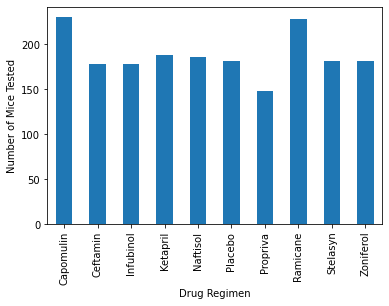

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouseTimeCount = cleanMouseData.groupby('Drug Regimen')['Timepoint'].count()
mouseTimeCount.plot.bar(x="Drug Regimen", y="Timepoint", ylabel='Number of Mice Tested' )

plt.show()

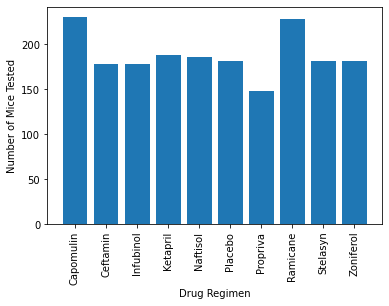

In [12]:
groupedDF = cleanMouseData.groupby('Drug Regimen')['Tumor Volume (mm3)']
x = [value for value in range(len(study_data_complete['Drug Regimen'].unique()))]
y = groupedDF.count()
drugName= cleanMouseData['Drug Regimen'].unique()
drugName.sort()
plt.bar(x, y)
plt.xticks(x, drugName, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

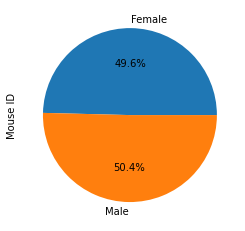

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouseGender = cleanMouseData.groupby('Sex')['Mouse ID'].nunique()
genderPie = mouseGender.plot(kind='pie', y='Sex',autopct='%1.1f%%')
plt.show()

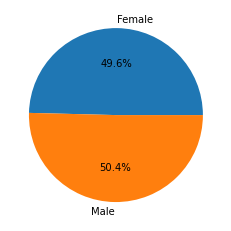

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = cleanMouseData['Sex'].unique().tolist()


total = cleanMouseData.groupby('Sex')['Mouse ID'].nunique()

plt.pie(total, labels = labels, autopct='%1.1f%%')


plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
fourDrugData = cleanMouseData[(cleanMouseData["Drug Regimen"] == "Capomulin") |
                        (cleanMouseData["Drug Regimen"] == "Ramicane")  |
                        (cleanMouseData["Drug Regimen"] == "Infubinol") |
                        (cleanMouseData["Drug Regimen"] == "Ceftamin")
                       ]

maxTime = fourDrugData.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(maxTime, cleanMouseData, on=("Mouse ID","Timepoint"), how = 'left')
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    tumorVolData = merged_data.loc[merged_data["Drug Regimen"] == drug, :]
    
    tumor_vol_list.append(tumorVolData['Tumor Volume (mm3)'])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tumorVolData['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
   
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5*IQR)
    upper_bound = quartiles[0.75] + (1.5*IQR)
    
    outliers = tumorVolData.loc[(tumorVolData['Tumor Volume (mm3)'] > upper_bound) |
                                  (tumorVolData['Tumor Volume (mm3)'] < lower_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Infubinol's potential outliers:    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
15  Female          18          25  
Ceftamin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


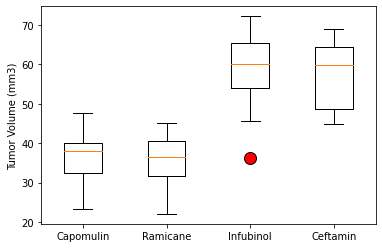

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_ylabel('Tumor Volume (mm3)')
props = dict(markerfacecolor = 'red', markersize = 12)
plt.boxplot(tumor_vol_list,labels=treatment_list,flierprops = props)

plt.show()

## Line and Scatter Plots

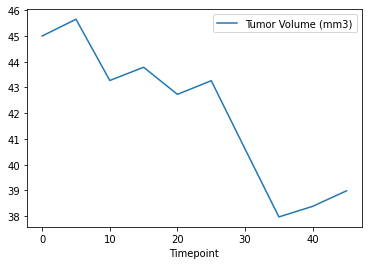

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capMouseID = cleanMouseData.loc[(cleanMouseData['Drug Regimen'] == 'Capomulin')].iloc[0]['Mouse ID']
capMouseData = cleanMouseData.loc[(cleanMouseData['Mouse ID'] == capMouseID)]

capMouseData.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')

plt.show()

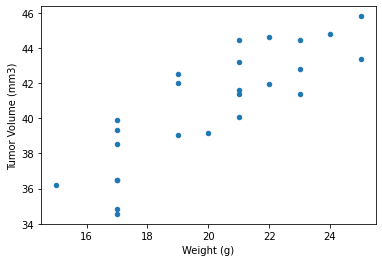

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capData = cleanMouseData.loc[(cleanMouseData['Drug Regimen'] == 'Capomulin')]
avgVolData = capData.groupby("Mouse ID")[['Weight (g)', 'Tumor Volume (mm3)']].mean()

avgVolData.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

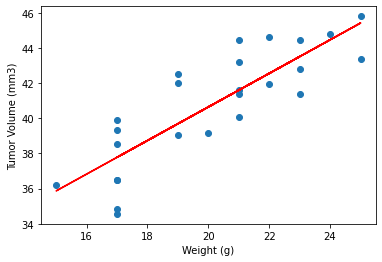

The correlation between both factors is 0.84


In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avgVolData['Weight (g)'], avgVolData['Tumor Volume (mm3)'])
regress_values = avgVolData['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avgVolData['Weight (g)'], avgVolData['Tumor Volume (mm3)'])
plt.plot(avgVolData['Weight (g)'],regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()
# Calculate the correlation
correlation = st.pearsonr(avgVolData['Weight (g)'], avgVolData['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
